In [212]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [213]:
all_divisions = {
    "Premier Main": 424,
    "2": 425,
    "3": 426,
    "4": 427,
    "5": 428,
    "6": 429,
    "7A": 430,
    "7B": 431,
    "8A": 432,
    "8B": 433,
    "9": 434,
    "10": 435,
    "11": 436,
    "12": 437,
    "13A": 438,
    "13B": 439,
    "14": 440,
    "15A": 441,
    "15B": 442,
    "Premier Masters": 443,
    "M2": 444,
    "M3": 445,
    "M4": 446,
    "Premier Ladies": 447,
    "L2": 448,
    "L3": 449,
    "L4": 450,
    }

In [214]:
base_directory = r"C:\Users\bpali\PycharmProjects\SquashApp\previous_seasons"

In [215]:
# Load all seasons summary data
summary_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "summary_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("summary_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        # Add Division column to the dataframe
        df["Division"] = file.split("_")[0]
        # Add Season column to the dataframe
        df["Season"] = season_folder
        # Add Rank column to the dataframe
        df["Rank"] = df.index + 1
        summary_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
all_previous_summary_df = pd.concat(summary_df_list, ignore_index=True)

In [216]:
# Load summary_dfs for 2024-2025 season

summary_directory = r"C:\Users\bpali\PycharmProjects\SquashApp\2024-2025\summary_df"

summary_dfs = []
for division in all_divisions.keys():
    for week in range(10, 0, -1):
        try:
            summary_df = pd.read_csv(f"{summary_directory}\\week_{week}\\{division}_summary_df.csv")
            summary_df["Division"] = division
            # Create Rank column based on Points column
            summary_df["Rank"] = summary_df.index + 1
            # Add Season column to the dataframe
            summary_df["Season"] = "2024-2025"
            summary_dfs.append(summary_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
summary_df_2024_2025 = pd.concat(summary_dfs)

In [217]:
# Concatenate the summary dataframes from all seasons
big_summary_df = pd.concat([all_previous_summary_df, summary_df_2024_2025], ignore_index=True)

# Drop rows where Played is equal to zero
big_summary_df = big_summary_df[big_summary_df["Played"] != 0]

In [218]:
# 2024-2025 ranking_df directory
ranking_df_dir = r"C:\Users\bpali\PycharmProjects\SquashApp\2024-2025\ranking_df"

In [219]:
# In the the summary directory are week_x folders (eg week_4). First check the most recent folder (ie the highest number), then check the next highest, etc, 
# using the all_divisions dictionary to make sure we load every division's most recent summary file and avoid loading an older file for a division that has a more recent file.

ranking_dfs = []
for division in all_divisions.keys():
    for week in range(10, 0, -1):
        try:
            ranking_df = pd.read_csv(f"{ranking_df_dir}\\week_{week}\\{division}_ranking_df.csv")
            ranking_df["Season"] = "2024-2025"
            ranking_dfs.append(ranking_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
ranking_df_2024_2025 = pd.concat(ranking_dfs)

In [220]:
# In the base directory are seasons folders (eg. 2019-2020, 2020-2021, etc.). We want to go through each season folder, go into the ranking_df folder for that season, 
# and read in all the ranking_df files (determined by whether the file ends in ranking_df) into a list of dataframes. We will then concatenate all the dataframes into one big dataframe.
# Add a Season column to the dataframe to keep track of which season the data is from.

ranking_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "ranking_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("ranking_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        df["Season"] = season_folder
        ranking_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
big_ranking_df = pd.concat(ranking_df_list)


In [221]:
# Concatenate the 2024-2025 ranking_df with the big_ranking_df
final_ranking_df = pd.concat([big_ranking_df, ranking_df_2024_2025])

### Total number of unique registered players by season

In [222]:
# Get total number of players in each season
total_players = final_ranking_df.groupby("Season")["Name of Player"].nunique()
total_players

Season
2016-2017    1890
2017-2018    1946
2018-2019    1900
2019-2020    1925
2021-2022    1592
2022-2023    1519
2023-2024    1657
2024-2025    1685
Name: Name of Player, dtype: int64

### Total number of unique players in each season to have played 5+ games

In [223]:
# Get total number of players in each season who have played at least 5 matches
total_players_5 = final_ranking_df[final_ranking_df["Games Played"] >= 5].groupby("Season")["Name of Player"].nunique()
total_players_5

Season
2016-2017    1597
2017-2018    1593
2018-2019    1584
2019-2020    1080
2021-2022     980
2022-2023    1252
2023-2024    1336
2024-2025      36
Name: Name of Player, dtype: int64

In [224]:
# Filter big_df to only include players who have played 5+ games
final_ranking_df_filtered = final_ranking_df[final_ranking_df["Games Played"] >= 1]

In [225]:
# Find players in Name of Player column who have played in all 7 seasons of Season column
players = final_ranking_df_filtered.groupby("Name of Player")["Season"].nunique().sort_values(ascending=False)

In [226]:
# Filter players who have played in all 7 seasons
players = players[players == 7]

In [227]:
players

Name of Player
Tang Gary Woon Cheung       7
Cheng Chung Wing Raymond    7
Cheng Chuen                 7
Liden Roger                 7
Li Ho Sum                   7
                           ..
Chan Nelson Kai Chi         7
Lee Dennis Yuk Kai          7
Grillo Francesco            7
Chan Muk Kan                7
Harjani Vinod               7
Name: Season, Length: 259, dtype: int64

In [228]:
# Drop rows where Division is NaN
final_ranking_df_filtered = final_ranking_df_filtered.dropna(subset=["Division"]).copy()
# Filter out rows where Division contains "M" or "L"
final_ranking_df_filtered = final_ranking_df_filtered[~final_ranking_df_filtered["Division"].str.contains("M|L", na=False)]
# Aggregate the data to ensure no duplicate entries
final_ranking_df_filtered_unique = final_ranking_df_filtered.groupby(["Name of Player", "Season"])["Division"].first().reset_index()
# Create a new dataframe where the seasons are the columns, the rows are the players, and the values are the division the player was in that season
player_divisions = final_ranking_df_filtered_unique.pivot(index="Name of Player", columns="Season", values="Division")

In [229]:
player_divisions

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025
Name of Player,,,,,,,,
* Chak Tony Kin Chung,15,12B,12A,NaN,17A,NaN,NaN,NaN
* Chan Kwok Wa,NaN,15B,16,15,15A,12A,NaN,NaN
* Cheung Tony Cheuk Lim,15,12B,12A,NaN,17A,17A,NaN,NaN
* Ho Kin Fung,NaN,12B,12A,NaN,17A,17A,NaN,NaN
* Ho Kwan Yin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...
^ West Steven,NaN,NaN,8,8,5,4,2,NaN
^ Windmill Mark,4,4,5,4,NaN,NaN,NaN,NaN
^ Yu Vincent Hok Yan,2,2,2,2,2,2,2,NaN


In [230]:
# Add a column to player_divisions that contains the number of seasons each player has played in, then sort by that column
player_divisions["Seasons Played"] = player_divisions.count(axis=1)
player_divisions_sorted = player_divisions.sort_values(by="Seasons Played", ascending=False)

In [231]:
player_divisions_sorted[player_divisions_sorted["Seasons Played"] == 8].sort_values(by="Name of Player")

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Seasons Played
Name of Player,,,,,,,,,
Adams David,10,11,11A,13A,13B,13,11,10,8
Adjemian Nicolas,13,10,13A,13A,10,10,10,6,8
Au Alex Ka Man,6,7B,7,9,8,10,10,7A,8
Au Ling Yu,18B,12A,10,5,4,3,3,4,8
Au Shuk Ting,17A,14,14,13A,13A,16,14,7B,8
...,...,...,...,...,...,...,...,...,...
Yip Tony Tsun Yuen,2,3,3,3,4,4,5,4,8
Yip Tsz Ho,10,4,3,3,6,4,2,3,8
Yiu Sai Ngoi,9,11,11A,12B,12A,12A,12A,8B,8


In [232]:
# Filter player_divisions_sorted for player whose name contains 'Heron'
filtered = player_divisions_sorted[player_divisions_sorted.index.str.contains("wong hin chor", case=False)]

In [233]:
filtered

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Seasons Played
Name of Player,,,,,,,,,
Wong Hin Chor,5,7A,7,NaN,7,10,8,7B,7


### HKCC Summary Analysis

In [234]:
big_summary_df[big_summary_df['Played'] == 0]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against


In [ ]:
# Filter big_summary_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
hkcc_summary = big_summary_df[big_summary_df["Team"].str.contains("HKCC", case=False) |
                              big_summary_df["Team"].str.contains("Hong Kong Cricket Club", case=False)]

#### League Winners

In [236]:
hkcc_summary[hkcc_summary["Rank"] == 1]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against
73,HKCC Wednesday Night Rockers,20,18,2,98,16B,2016-2017,1,NaN,NaN
207,Hong Kong Cricket Club L2B,18,15,3,72,L2,2016-2017,1,NaN,NaN
214,Hong Kong Cricket Club L3,12,9,3,46,L3,2016-2017,1,NaN,NaN
387,Hong Kong Cricket Club 1,18,13,5,68,3,2017-2018,1,NaN,NaN
461,Hong Kong Cricket Club L2,15,13,2,59,L2,2017-2018,1,NaN,NaN
475,Hong Kong Cricket Club M1,16,13,3,65,M1,2017-2018,1,NaN,NaN
523,Hong Kong Cricket Club 6,21,20,1,102,11B,2018-2019,1,NaN,NaN
610,Hong Kong Cricket Club 8,22,19,3,103,18,2018-2019,1,NaN,NaN
719,Hong Kong Cricket Club M1A,20,14,6,65,M1,2018-2019,1,NaN,NaN
748,Hong Kong Cricket Club 10,9,9,0,40,10,2019-2020,1,NaN,NaN


In [237]:
# Show count of Rank equals 1 by Season
hkcc_summary[hkcc_summary["Rank"] == 1].groupby("Season")["Rank"].count()

Season
2016-2017    3
2017-2018    3
2018-2019    3
2019-2020    4
2021-2022    1
2022-2023    1
2023-2024    1
Name: Rank, dtype: int64

In [238]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = hkcc_summary["Won"].sum() / hkcc_summary["Played"].sum()
win_percentage


0.5354629128316188

In [239]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
hkcc_summary = hkcc_summary.copy()
hkcc_summary["Win Percentage"] = hkcc_summary["Won"] / hkcc_summary["Played"]
hkcc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.517713
2017-2018    0.578402
2018-2019    0.605505
2019-2020    0.592215
2021-2022    0.483460
2022-2023    0.504749
2023-2024    0.427531
2024-2025    0.460784
Name: Win Percentage, dtype: float64

In [240]:
hkcc_summary.sort_values(by="Played")

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against,Win Percentage
1795,Hong Kong Cricket Club L4,2,2,0,7,L4,2024-2025,2,5.0,1.0,1.000000
1781,Hong Kong Cricket Club L1,2,0,2,1,Premier Ladies,2024-2025,5,1.0,5.0,0.000000
1754,Hong Kong Cricket Club M1B,2,1,1,3,Premier Masters,2024-2025,5,2.0,4.0,0.500000
1587,Hong Kong Cricket Club 1,3,3,0,9,Premier Main,2024-2025,2,6.0,3.0,1.000000
1594,Hong Kong Cricket Club 2,3,1,2,6,2,2024-2025,3,5.0,7.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
260,Hong Kong Cricket Club 6,22,13,9,78,11,2017-2018,3,NaN,NaN,0.590909
354,Hong Kong Cricket Club Junior 2,22,19,3,101,18,2017-2018,2,NaN,NaN,0.863636
1476,Hong Kong Cricket Club 8,22,8,14,53,18,2023-2024,8,NaN,NaN,0.363636
1433,Hong Kong Cricket Club Rockers,22,15,7,81,15,2023-2024,4,NaN,NaN,0.681818


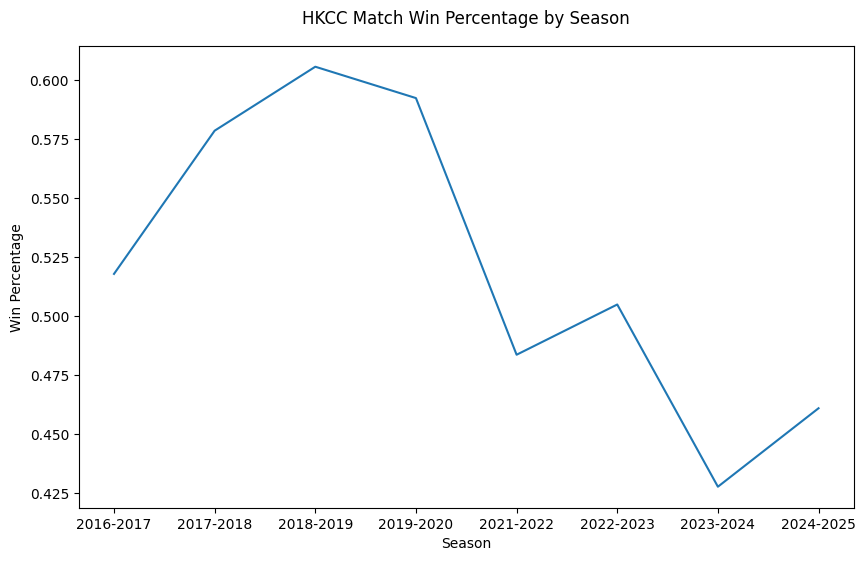

In [241]:
# Draw a line plot of the Win Percentage by Season
plt.figure(figsize=(10, 6))
# Draw a line plot of the Win Percentage by Season without confidence interval
sns.lineplot(data=hkcc_summary, x="Season", y="Win Percentage", errorbar=None)
# Set the title of the plot
plt.title("HKCC Match Win Percentage by Season", y=1.03)
# Remove gridlines
plt.grid(False)

### KCC Win Percentage by Season

In [242]:
# Filter big_summary_df for Team column that contains "KCC" or "Kowloon Cricket Club", but not "HKCC"
kcc_summary = big_summary_df[big_summary_df["Team"].str.contains(r"\b(?:Kowloon Cricket Club|KCC)\b", flags=re.IGNORECASE)]

In [243]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = kcc_summary["Won"].sum() / kcc_summary["Played"].sum()
win_percentage

0.673328738800827

In [244]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
kcc_summary = kcc_summary.copy()
kcc_summary["Win Percentage"] = kcc_summary["Won"] / kcc_summary["Played"]
kcc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.625702
2017-2018    0.641083
2018-2019    0.704762
2019-2020    0.681812
2021-2022    0.709041
2022-2023    0.624034
2023-2024    0.683452
2024-2025    0.646667
Name: Win Percentage, dtype: float64

### HKFC Win Percentage by Season

In [245]:
# Filter big_summary_df for Team column that contains "HKFC" or "Hong Kong Football Club"
hkfc_summary = big_summary_df[big_summary_df["Team"].str.contains("HKFC", case=False) |
                              big_summary_df["Team"].str.contains("Hong Kong Football Club", case=False)]

In [246]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
hkfc_win_percentage = hkfc_summary["Won"].sum() / hkfc_summary["Played"].sum()
hkfc_win_percentage

0.5538881309686221

In [247]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
hkfc_summary = hkfc_summary.copy()
hkfc_summary["Win Percentage"] = hkfc_summary["Won"] / hkfc_summary["Played"]
hkfc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.554078
2017-2018    0.540525
2018-2019    0.548704
2019-2020    0.584957
2021-2022    0.509099
2022-2023    0.530581
2023-2024    0.589479
2024-2025    0.538158
Name: Win Percentage, dtype: float64

In [248]:
usrc_summary = big_summary_df[big_summary_df["Team"].str.contains("united services", case=False) |
               big_summary_df["Team"].str.contains("usrc", case=False)]

In [249]:
# Get overall win percentage record for usrc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
usrc_win_percentage = usrc_summary["Won"].sum() / usrc_summary["Played"].sum()
usrc_win_percentage

0.5677233429394812

In [250]:
# Show Win Percentage by Season but avoid SettingWithCopyWarning
usrc_summary = usrc_summary.copy()
usrc_summary["Win Percentage"] = usrc_summary["Won"] / usrc_summary["Played"]
usrc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.474890
2017-2018    0.636508
2018-2019    0.649747
2019-2020    0.714646
2021-2022    0.355219
2022-2023    0.518519
2023-2024    0.541667
2024-2025    0.697222
Name: Win Percentage, dtype: float64

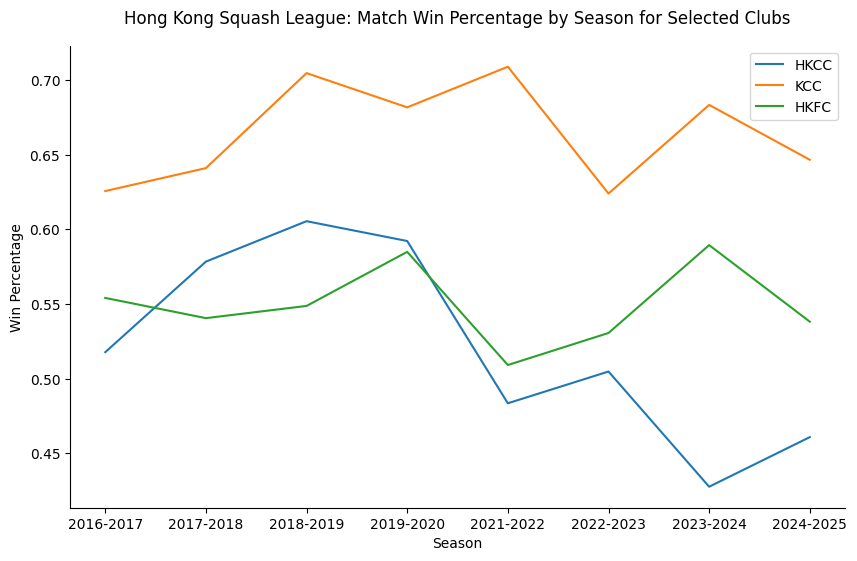

In [251]:
# Draw a graph of the Win Percentage by Season for HKFC, KCC, and HKCC
plt.figure(figsize=(10, 6))
# Draw a line plot of the Win Percentage by Season for HKCC
sns.lineplot(data=hkcc_summary, x="Season", y="Win Percentage", label="HKCC", errorbar=None)
# Draw a line plot of the Win Percentage by Season for KCC
sns.lineplot(data=kcc_summary, x="Season", y="Win Percentage", label="KCC", errorbar=None)
# Draw a line plot of the Win Percentage by Season for HKFC
sns.lineplot(data=hkfc_summary, x="Season", y="Win Percentage", label="HKFC", errorbar=None)
# Set the title of the plot
plt.title("Hong Kong Squash League: Match Win Percentage by Season for Selected Clubs", y=1.03)
# Remove gridlines
plt.grid(False)
# Add a legend to the plot
plt.legend()
# remove top and right spines
sns.despine()

In [252]:
kcc_summary[kcc_summary["Rank"] == 1]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against,Win Percentage
32,Perrier KCC 8,20,18,2,94,13,2016-2017,1,NaN,NaN,0.900000
180,Perrier KCC 6,20,17,3,87,8A,2016-2017,1,NaN,NaN,0.850000
201,Perrier KCC L1A,15,14,1,51,L1,2016-2017,1,NaN,NaN,0.933333
377,Perrier Sergio Tacchini KCC 1,16,13,3,44,1,2017-2018,1,NaN,NaN,0.812500
382,Perrier Sergio Tacchini KCC 2A,16,12,4,66,2,2017-2018,1,NaN,NaN,0.750000
394,Perrier Sergio Tacchini KCC 3,18,16,2,88,4,2017-2018,1,NaN,NaN,0.888889
480,Perrier Sergio Tacchini KCC M2,18,18,0,93,M2,2017-2018,1,NaN,NaN,1.000000
553,Perrier Sergio Tacchini KCC 8,21,18,3,97,13B,2018-2019,1,NaN,NaN,0.857143
637,Perrier Sergio Tacchini KCC 1,20,15,5,59,1,2018-2019,1,NaN,NaN,0.750000
643,Perrier Sergio Tacchini KCC 2A,15,12,3,62,2,2018-2019,1,NaN,NaN,0.800000


In [253]:
# Show win percentage by division for KCC
kcc_summary.groupby("Division")["Win Percentage"].mean().sort_values(ascending=False)

Division
M2                1.000000
11                0.872001
13B               0.857143
8A                0.850000
8                 0.805324
5                 0.795403
4                 0.789445
M4                0.778611
L2                0.755556
7B                0.750000
10                0.732143
13                0.729563
6                 0.689286
3                 0.641245
7                 0.636364
18                0.636364
1                 0.620660
19                0.611111
2                 0.590556
L1                0.577428
11A               0.571429
M3                0.570635
9                 0.500000
14                0.500000
Premier Main      0.500000
15A               0.444444
Premier Ladies    0.416667
19B               0.214286
Name: Win Percentage, dtype: float64

In [254]:
kcc_summary[(kcc_summary["Division"] == "8") | 
            (kcc_summary["Division"] == "8A")]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against,Win Percentage
180,Perrier KCC 6,20,17,3,87,8A,2016-2017,1,NaN,NaN,0.850000
443,Perrier Sergio Tacchini KCC 5,16,11,5,61,8,2017-2018,3,NaN,NaN,0.687500
692,Perrier Sergio Tacchini KCC 6,20,19,1,100,8,2018-2019,1,NaN,NaN,0.950000
930,PERRIER SERGIO TACCHINI KCC 6,8,6,2,33,8,2019-2020,3,NaN,NaN,0.750000
1140,Perrier Sergio Tacchini KCC 6,12,11,1,60,8,2021-2022,1,NaN,NaN,0.916667
1335,Sergio Tacchini KCC 8,18,14,4,75,8,2022-2023,1,NaN,NaN,0.777778
1536,Kowloon Cricket Club 8,16,12,4,63,8,2023-2024,2,NaN,NaN,0.750000


In [255]:
# Count the total number of matches in Played column by Season in big_summary_df
big_summary_df.groupby("Season")["Played"].sum()

Season
2016-2017    4668
2017-2018    4644
2018-2019    4826
2019-2020    2236
2021-2022    2058
2022-2023    3538
2023-2024    3772
2024-2025     776
Name: Played, dtype: int64

In [256]:
# Find count of Teams in big_summary_df by Clubs
big_summary_df["Team"].str.extract(r"(Hong Kong Cricket Club|KCC|Hong Kong Football Club)").value_counts()

Hong Kong Football Club    261
Hong Kong Cricket Club     127
KCC                         81
Name: count, dtype: int64

In [257]:
lrc_summary = big_summary_df[big_summary_df["Team"].str.contains("LRC", case=False) |
               big_summary_df["Team"].str.contains("Ladies Recreation Club", case=False)]

In [258]:
print(len(hkfc_summary), len(kcc_summary), len(hkcc_summary), len(lrc_summary))

261 107 132 25


In [259]:
big_summary_df.sort_values(by="Team").to_csv("big_summary_df.csv", index=False)

In [260]:
len(big_summary_df[big_summary_df["Team"].str.contains("Advance", case=False)])

93

In [261]:
len(big_summary_df[big_summary_df["Team"].str.contains("friend", case=False)])

61

In [262]:
advance_summary = big_summary_df[big_summary_df["Team"].str.contains("Advance", case=False)]

# Get overall win percentage record for advance_summary, summing all rows in Won column and dividing by sum of all rows in Played column
advance_win_percentage = advance_summary["Won"].sum() / advance_summary["Played"].sum()
print(advance_win_percentage)

# Show Win Percentage by Season but avoid SettingWithCopyWarning
advance_summary = advance_summary.copy()
advance_summary["Win Percentage"] = advance_summary["Won"] / advance_summary["Played"]
print(advance_summary.groupby("Season")["Win Percentage"].mean())

0.5649756775538568
Season
2016-2017    0.634783
2017-2018    0.628957
2018-2019    0.571479
2019-2020    0.405789
2021-2022    0.673377
2022-2023    0.594004
2023-2024    0.369848
2024-2025    0.158333
Name: Win Percentage, dtype: float64


In [263]:
sha_tin_summary = big_summary_df[big_summary_df["Team"].str.contains("sha tin", case=False) |
                big_summary_df["Team"].str.contains("shatin", case=False)]